---
# Google Play Store apps and reviews
---
<p>Mobile apps are everywhere. They are easy to create and can be lucrative. Because of these two factors, more and more apps are being developed. In this notebook, I will do a comprehensive analysis of the Android app market by comparing almost ten thousand apps in Google Play across different categories. I will look for insights in the data to devise strategies to drive growth and retention.</p>
<p><img src="assets/google_play.jpg" alt="Google Play"></p>
<p>Let us take a look at the data, which consists of two files:</p>
<ul>
<li><code>apps.csv</code>: contains all the details of the applications on Google Play. There are 13 features that describe a given app.</li>
<li><code>user_reviews.csv</code>: contains 100 reviews for each app. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.</li>
</ul>

---
## 1. Setup
---

In [1]:
# Import packages
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns

# Set matplotlib style to match seaborn"s style
plt.style.use("seaborn")

# Read in dataset
apps = pd.read_csv("assets/apps.csv", index_col=0)

---
## 2. Data cleaning
---
<p>A careful glance of the dataset reveals that some of the columns mandate data cleaning in order to be consumed by code I will write later. Specifically, the presence of special characters (<code>, $ +</code>) and letters (<code>M k</code>) in the <code>Installs</code>, <code>Size</code>, and <code>Price</code> columns make their conversion to a numerical data type difficult. Let us clean by removing these and converting each column to a numeric type.</p>

In [2]:
# List of characters to remove
chars_to_remove = ["+", ",", "M", "$"]

# List of column names to clean
cols_to_clean = ["Installs", "Size", "Price"]

# Loop for each column
for col in cols_to_clean:
    # Replace each character with an empty string
    for char in chars_to_remove:
        apps[col] = apps[col].str.replace(char, "")
    # Convert col to numeric
    apps[col] = pd.to_numeric(apps[col])

---
## 3. Exploring app categories
---
<p>With more than 1 billion active users in 190 countries around the world, Google Play continues to be an important distribution platform to build a global audience. For businesses to get their apps in front of users, it is important to make them more quickly and easily discoverable on Google Play. To improve the overall search experience, Google has introduced the concept of grouping apps into categories.</p>
<p>This brings me to the following questions:</p>
<ul>
<li>Which category has the highest share of (active) apps in the market? </li>
<li>Is any specific category dominating the market?</li>
<li>Which categories have the fewest number of apps?</li>
</ul>

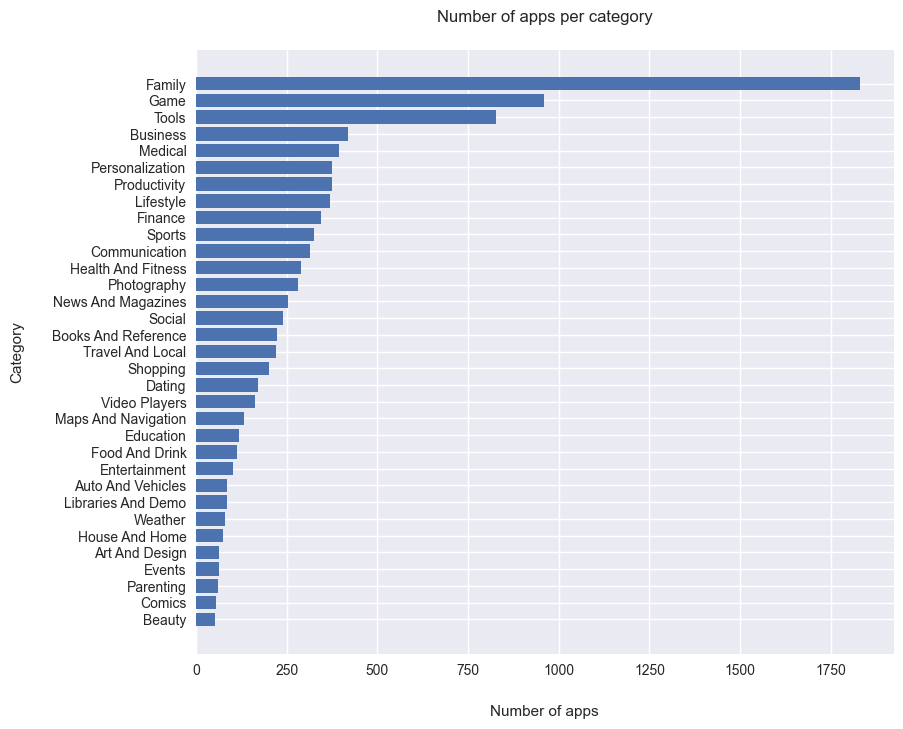

In [3]:
# Count the number of apps in each "Category"
num_apps_in_category = apps["Category"].value_counts().sort_values()

# Plot number of apps per category
fig = plt.figure(figsize=(9, 8), dpi=100)
ax = fig.add_subplot()
ax.barh(y=num_apps_in_category.index.str.title().str.replace("_", " "), width=num_apps_in_category.values)
ax.set_title("Number of apps per category", pad=20)
ax.set_xlabel("Number of apps", labelpad=20)
ax.set_ylabel("Category", labelpad=20)
plt.show()

<p>We see that there are <code>33</code> unique app categories present in our dataset. <code>Family</code> and <code>Game</code> apps have the highest market prevalence. Interestingly, <code>Tools</code>, <code>Business</code> and <code>Medical</code> apps are also at the top.</p>

---
## 4. Distribution of app ratings
---
<p>After having witnessed the market share for each category of apps, let us see how all these apps perform on an average. App ratings (on a scale of 1 to 5) impact the discoverability, conversion of apps as well as the company's overall brand image. Ratings are a key performance indicator of an app.</p>

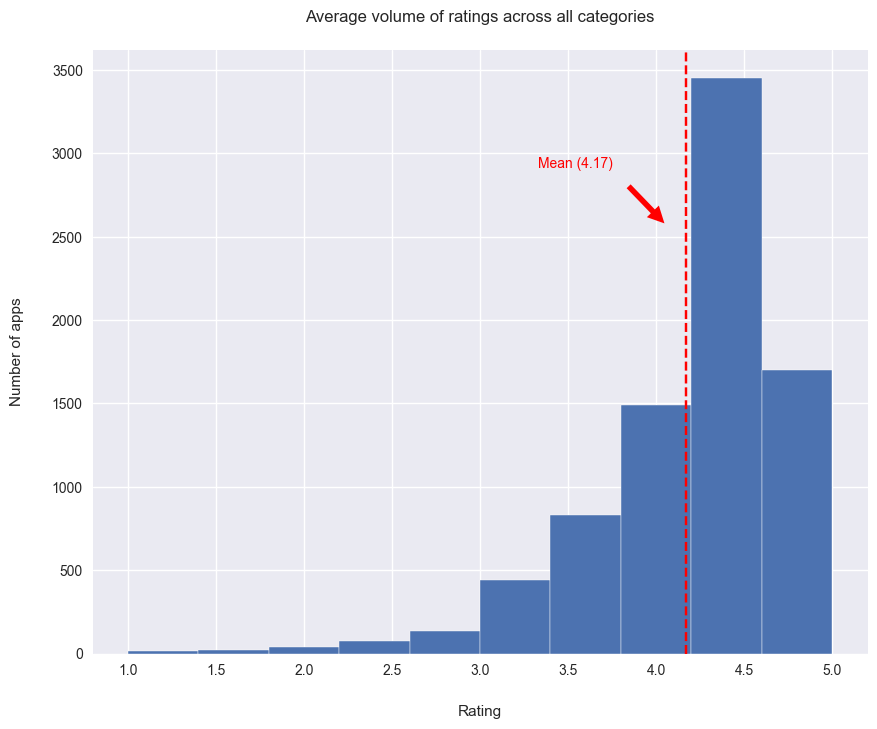

In [4]:
# Omit an insignificant warning
import warnings
warnings.filterwarnings("ignore")

# Average rating of apps
avg_app_rating = apps["Rating"].mean().round(2)

# Plot distribution of apps according to their ratings
fig = plt.figure(figsize=(10, 8), dpi=100)
ax = fig.add_subplot()
ax.hist(x=apps["Rating"], edgecolor="white")
ax.set_title("Average volume of ratings across all categories", pad=20)
ax.set_xlabel("Rating", labelpad=20)
ax.set_ylabel("Number of apps", labelpad=20)
ax.axvline(avg_app_rating, color="red", linestyle="--",)
ax.annotate(f"Mean ({avg_app_rating})", color="red",
            xy=(avg_app_rating - 0.05, 2500), xycoords="data",
            xytext=(-100, 50), textcoords="offset points",
            arrowprops=dict(facecolor="red",
                            edgecolor="None",
                            shrink=0.2))
plt.show()

<p>The graph above shows that the average volume of ratings across all app categories is <code>4.17</code>. The histogram plot is skewed to the left indicating that the majority of the apps are highly rated with only a few exceptions in the low-rated apps.</p>

---
## 5. Size and price of an app
---
<p>Let us now examine app size and app price. For size, if the mobile app is too large, it may be difficult and/or expensive for users to download. Lengthy download times could turn users off before they even experience your mobile app. Plus, each user's device has a finite amount of disk space. For price, some users expect their apps to be free or inexpensive. These problems compound if the developing world is part of your target market; especially due to internet speeds, earning power and exchange rates.</p>
<p>How can we effectively come up with strategies to size and price our app?</p>
<ul>
<li>Does the size of an app affect its rating? </li>
<li>Do users really care about system-heavy apps or do they prefer light-weighted apps? </li>
<li>Does the price of an app affect its rating? </li>
<li>Do users always prefer free apps over paid apps?</li>
</ul>

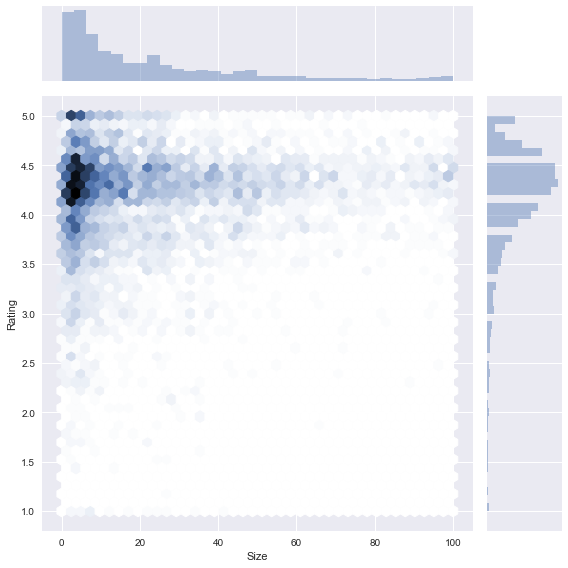

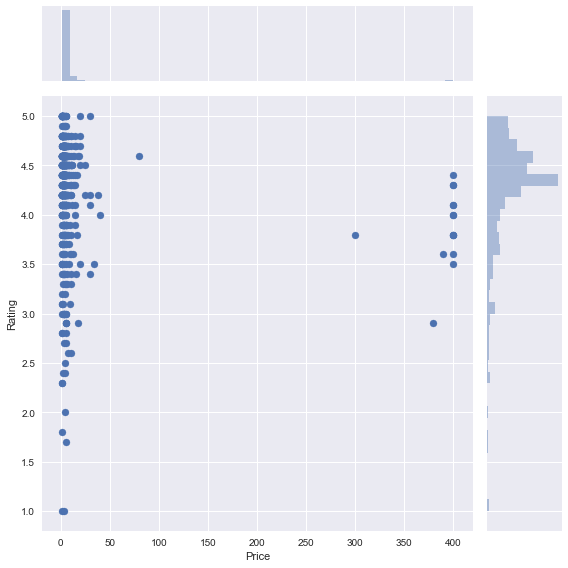

In [5]:
# Subset for categories with at least 250 apps
large_categories = apps.groupby("Category").filter(lambda x: len(x) >= 250).reset_index()

# Plot size vs. rating
sns.jointplot(x = large_categories["Size"], y = large_categories["Rating"], kind = "hex", height=8)
plt.show()

# Subset out apps whose type is "Paid"
paid_apps = apps[apps["Type"] == "Paid"]

# Plot price vs. rating
sns.jointplot(x = paid_apps["Price"], y = paid_apps["Rating"], height=8)
plt.show()

<p>I find that the majority of top rated apps (rating over 4) range from 2 MB to 20 MB. I also find that the vast majority of apps price themselves under $10.</p>

---
## 6. Relation between app category and app price
---
<p>So now comes the hard part. How are companies and developers supposed to make ends meet? What monetization strategies can companies use to maximize profit? The costs of apps are largely based on features, complexity, and platform.</p>
<p>There are many factors to consider when selecting the right pricing strategy for your mobile app. It is important to consider the willingness of your customer to pay for your app. A wrong price could break the deal before the download even happens. Potential customers could be turned off by what they perceive to be a shocking cost, or they might delete an app they have downloaded after receiving too many ads or simply not getting their money's worth. Different categories demand different price ranges. Some apps that are simple and used daily, like the calculator app, should probably be kept free. However, it would make sense to charge for a highly-specialized medical app that diagnoses diabetic patients. </p>

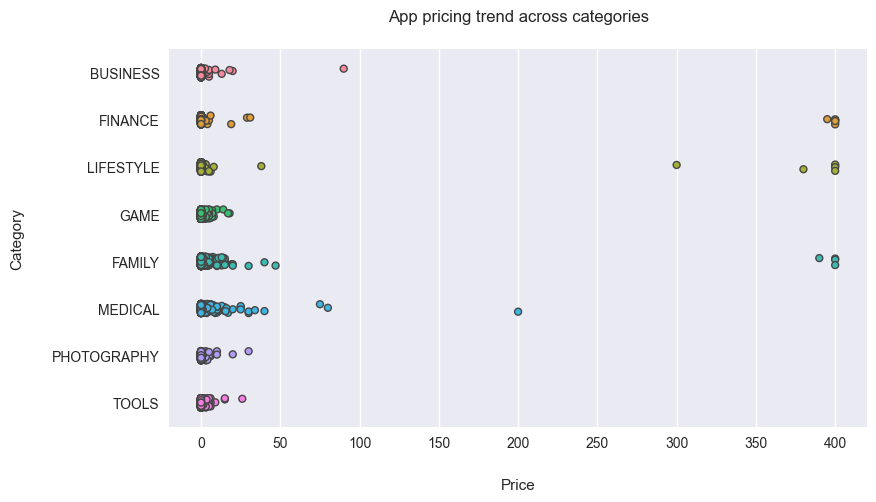

In [6]:
# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(["GAME", "FAMILY", "PHOTOGRAPHY",
                                            "MEDICAL", "TOOLS", "FINANCE",
                                            "LIFESTYLE","BUSINESS"])]

# Examine the price trend by plotting Price vs Category
fig = plt.figure(figsize=(9, 5), dpi=100)
ax = fig.add_subplot()
ax = sns.stripplot(x=popular_app_cats["Price"], y=popular_app_cats["Category"], jitter=True, linewidth=1)
ax.set_title("App pricing trend across categories", pad=20)
ax.set_xlabel("Price", labelpad=20)
ax.set_ylabel("Category", labelpad=20)
plt.show()

<p>Above, I see that <code>Medical</code> and <code>Family</code> apps are the most expensive. Some medical apps extend even up to $80! All game apps are reasonably priced below $20.</p>

---
## 7. Filter out "junk" apps
---
<p>It looks like a bunch of the really expensive apps are "junk" apps. That is, apps that do not really have a purpose. Some app developer may create an app called <em>I Am Rich Premium</em> or <em>most expensive app (H)</em> just for a joke or to test their app development skills. Some developers even do this with malicious intent and try to make money by hoping people accidentally click purchase on their app in the store. I will filter out these junk apps and re-do the visualization.</p>

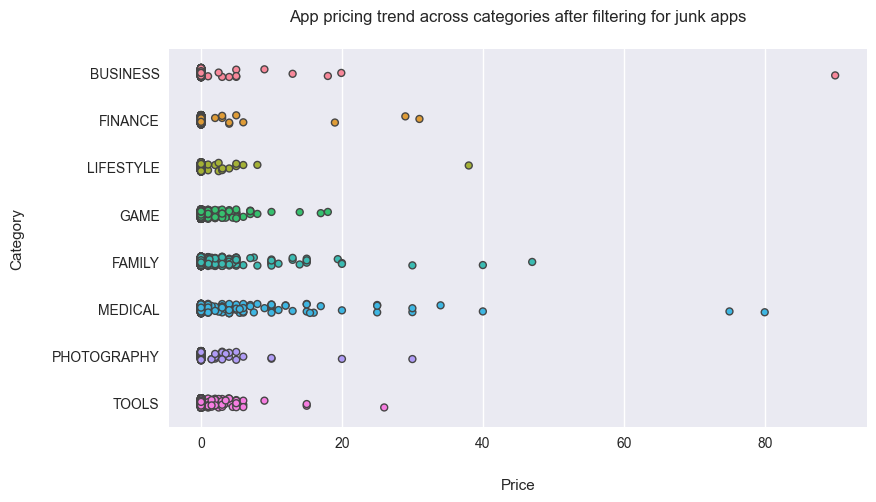

In [10]:
# Select apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats["Price"] < 100]

# Examine the price trend by plotting Price vs Category
fig = plt.figure(figsize=(9, 5), dpi=100)
ax = fig.add_subplot()
ax = sns.stripplot(x=popular_app_cats["Price"], y=apps_under_100["Category"], jitter=True, linewidth=1)
ax.set_title("App pricing trend across categories after filtering for junk apps", pad=20)
ax.set_xlabel("Price", labelpad=20)
ax.set_ylabel("Category", labelpad=20)
plt.show()

<p>The distribution of apps under $20 becomes clearer.</p>

---
## 8. Popularity of paid apps vs free apps
---
<p>For apps in the Play Store today, there are five types of pricing strategies: free, freemium, paid, paymium, and subscription. I will focus on free and paid apps only. Some characteristics of free apps are:</p>
<ul>
<li>Free to download.</li>
<li>Main source of income often comes from advertisements.</li>
<li>Often created by companies that have other products and the app serves as an extension of those products.</li>
<li>Can serve as a tool for customer retention, communication, and customer service.</li>
</ul>
<p>Some characteristics of paid apps are:</p>
<ul>
<li>Users are asked to pay once for the app to download and use it.</li>
<li>The user can not really get a feel for the app before buying it.</li>
</ul>
<p>Are paid apps installed as much as free apps?</p> 

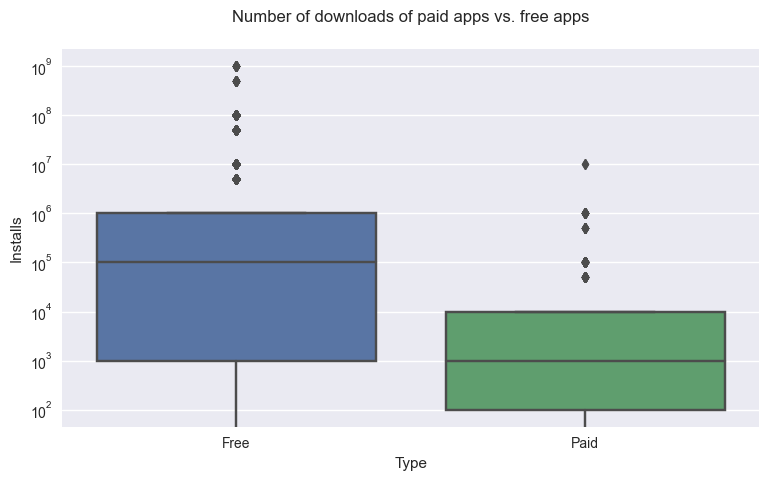

In [8]:
fig = plt.figure(figsize=(9, 5), dpi=100)
ax = fig.add_subplot()
ax1 = sns.boxplot(x="Type", y="Installs", data=apps)
ax1.set_yscale("log")
ax.set_title("Number of downloads of paid apps vs. free apps", pad=20)
plt.show()

<p>It turns out that paid apps have a relatively lower number of installs than free apps, though the difference is not as stark as I would have expected!</p>

---
## 9. Sentiment analysis of user reviews
---
<p>Mining user review data to determine how people feel about your product, brand, or service can be done using a technique called sentiment analysis. User reviews for apps can be analyzed to identify if the mood is positive, negative or neutral about that app. For example, positive words in an app review might include words such as "amazing", "friendly", "good", "great", and "love". Negative words might be words like "malware", "hate", "problem", "refund", and "incompetent".</p>

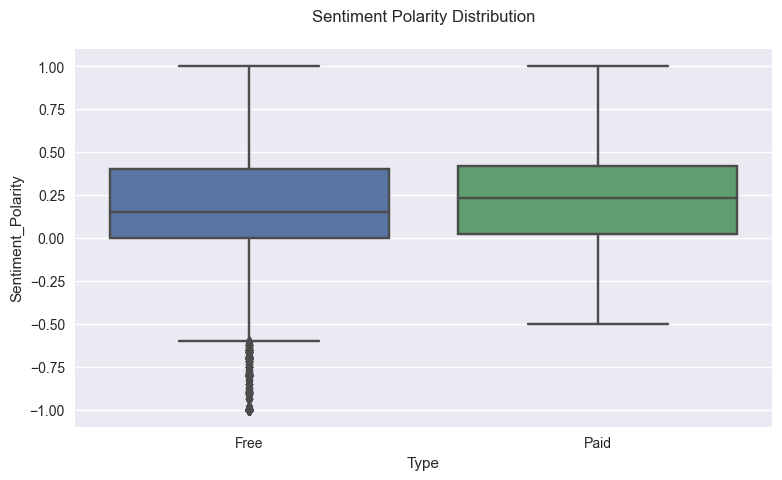

In [9]:
# Load user_reviews.csv
reviews = pd.read_csv("assets/user_reviews.csv")

# Join and merge the two dataframe
merged = pd.merge(apps, reviews, on="App", how="inner")

# Drop NA values from Sentiment and Translated_Review columns
merged = merged.dropna(subset=["Sentiment", "Translated_Review"])

# User review sentiment polarity for paid vs. free apps
fig = plt.figure(figsize=(9, 5), dpi=100)
ax = sns.boxplot(x="Type", y="Sentiment_Polarity", data=merged)
ax.set_title("Sentiment Polarity Distribution", pad=20)
plt.show()

<p>By plotting sentiment polarity scores of user reviews for paid and free apps, we observe that free apps receive a lot of harsh comments, as indicated by the outliers on the negative y-axis. Reviews for paid apps appear never to be extremely negative. This may indicate something about app quality, i.e., paid apps being of higher quality than free apps on average. The median polarity score for paid apps is a little higher than free apps, thereby syncing with our previous observation.</p>
<p>In this notebook, I analyzed over ten thousand apps from the Google Play Store. I can use these findings to help managers and development teams to make better business decisions when they decide to create an app.</p>